In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

load_iris = datasets.load_iris()

In [17]:
X = load_iris.data
y = load_iris.target
# print(X.shape, y.shape)
# print(X[:5], y[:5])
nb_model = GaussianNB()
nb_model.fit(X, y)
y_predict = nb_model.predict(X)
conf_matrix = metrics.confusion_matrix(y, y_predict)
errors = np.sum(y_predict != y)

print(conf_matrix)
print(f'Errors: {errors}')

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Errors: 6


In [22]:
X = load_iris.data
y = load_iris.target
# print(X.shape, y.shape)
# print(X[:5], y[:5])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_predict = nb_model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predict)
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
Accuracy: 0.9777777777777777


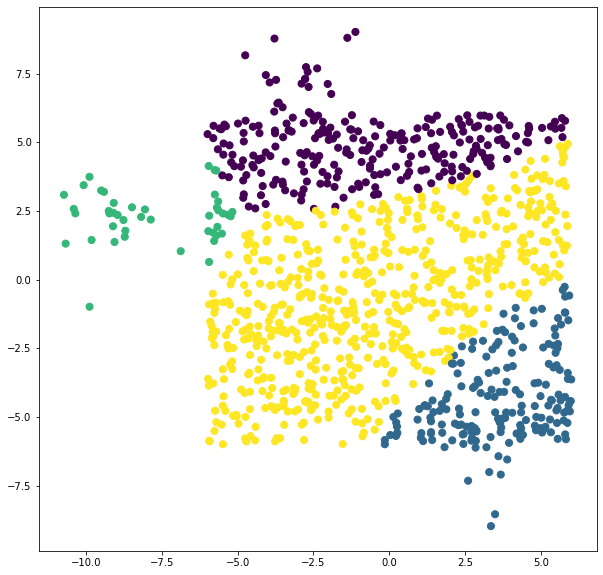

In [30]:
X, y = datasets.make_blobs(n_samples=100, centers=4, n_features=2)
nb_model = GaussianNB()
nb_model.fit(X, y)

rnd_gnr = np.random.RandomState(0)
x_test_rnd = rnd_gnr.uniform(low=-6, high=6, size=(1000, 2))
y_predict_rnd = nb_model.predict(x_test_rnd)

plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(x_test_rnd[:, 0], x_test_rnd[:, 1], c=y_predict_rnd, s=50, cmap='viridis')
lim = plt.axis()
plt.axis(lim)
plt.show()


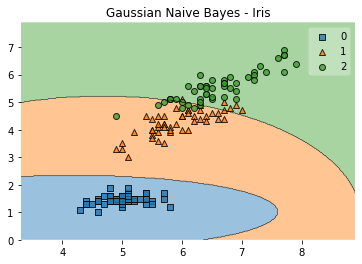

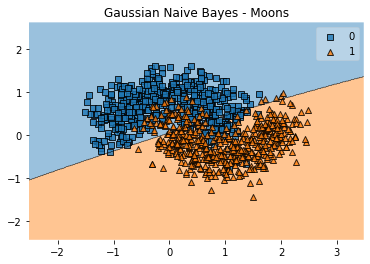

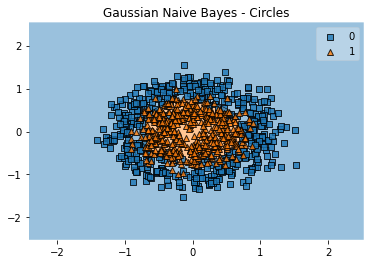

C:\ProgramData\Anaconda3\envs\RT-Academy\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


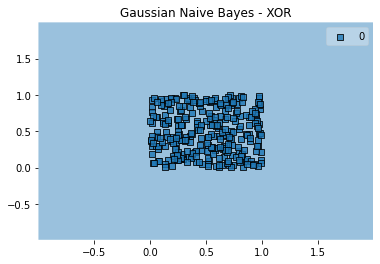

In [47]:
X, y = load_iris.data[:, [0,2]], load_iris.target
nb_model = GaussianNB()
nb_model.fit(X, y)
plt.title('Gaussian Naive Bayes - Iris')
plot_decision_regions(X, y, clf=nb_model, legend='best')
plt.show()

X, y = datasets.make_moons(n_samples=1000, noise=0.3)
nb_model = GaussianNB()
nb_model.fit(X, y)
plt.title('Gaussian Naive Bayes - Moons')
plot_decision_regions(X, y, clf=nb_model, legend='best')
plt.show()

X, y = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.5)
nb_model = GaussianNB()
nb_model.fit(X, y)
plt.title('Gaussian Naive Bayes - Circles')
plot_decision_regions(X, y, clf=nb_model, legend='best')
plt.show()

# create xor dataset
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rnd_gnr = np.random.RandomState(0)
X = rnd_gnr.rand(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)
nb_model = GaussianNB()
nb_model.fit(X, y)
plt.title('Gaussian Naive Bayes - XOR')
plot_decision_regions(X, y, clf=nb_model, legend='best')
plt.show()